In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [57]:
import neattext.functions as nfx
from neattext.functions import clean_text

In [58]:
df = pd.read_csv("labeled_data.csv")
df.head(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [60]:
df = df.drop('Unnamed: 0',axis = True)
df = df.drop('count',axis = True)
df = df.drop('offensive_language',axis = True)
df = df.drop('neither',axis = True)
df = df.drop('hate_speech',axis = True)

df.head(5)

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [61]:
df['class'].unique()

array([2, 1, 0], dtype=int64)

In [62]:
df['class'].value_counts()# 0 - hate speech 1 - offensive language 2 - neither

1    19190
2     4163
0     1430
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

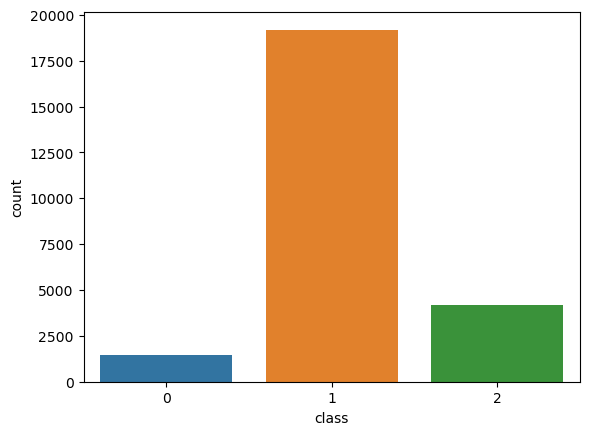

In [63]:
sns.countplot(x='class',data=df)

In [64]:
print(df[df['class'] == 0])

       class                                              tweet
85         0  "@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...
89         0  "@CB_Baby24: @white_thunduh alsarabsss" hes a ...
110        0  "@DevilGrimz: @VigxRArts you're fucking gay, b...
184        0  "@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...
202        0  "@NoChillPaz: "At least I'm not a nigger" http...
...      ...                                                ...
24576      0                this guy is the biggest faggot omfg
24685      0  which one of these names is more offensive kik...
24751      0         you a pussy ass nigga and I know it nigga.
24776      0                                 you're all niggers
24777      0  you're such a retard i hope you get type 2 dia...

[1430 rows x 2 columns]


In [65]:
print(df[df['class'] == 1])

       class                                              tweet
1          1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2          1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3          1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4          1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5          1  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...
...      ...                                                ...
24774      1  you really care bout dis bitch. my dick all in...
24775      1   you worried bout other bitches, you need me for?
24778      1  you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24780      1  young buck wanna eat!!.. dat nigguh like I ain...
24781      1              youu got wild bitches tellin you lies

[19190 rows x 2 columns]


In [66]:
print(df[df['class'] == 2])

       class                                              tweet
0          2  !!! RT @mayasolovely: As a woman you shouldn't...
40         2    " momma said no pussy cats inside my doghouse "
63         2  "@Addicted2Guys: -SimplyAddictedToGuys http://...
66         2  "@AllAboutManFeet: http://t.co/3gzUpfuMev" woo...
67         2  "@Allyhaaaaa: Lemmie eat a Oreo &amp; do these...
...      ...                                                ...
24736      2  yaya ho.. cute avi tho RT @ViVaLa_Ari I had no...
24737      2  yea so about @N_tel 's new friend.. all my fri...
24767      2  you know what they say, the early bird gets th...
24779      2  you've gone and broke the wrong heart baby, an...
24782      2  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...

[4163 rows x 2 columns]


In [67]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [68]:
data = pd.DataFrame()
data['class'] = df['class']
data['tweet'] = df['tweet'].apply(nfx.remove_userhandles)

In [69]:
data['tweet'] = df['tweet'].apply(nfx.remove_puncts)
data.head(5)

,class,tweet
0,2,RT @mayasolovely: As a woman you shouldnt com...
1,1,RT @mleew17: boy dats coldtyga dwn bad for cu...
2,1,RT @UrKindOfBrand Dawg RT @80sbaby4life: You ...
3,1,RT @CGAnderson: @vivabased she look like a tr...
4,1,RT @ShenikaRoberts: The shit you hear about m...


In [70]:
data['tweet'] = data['tweet'].apply(nfx.remove_stopwords)
data.head(5)

,class,tweet
0,2,RT @mayasolovely: woman shouldnt complain clea...
1,1,RT @mleew17: boy dats coldtyga dwn bad cuffin ...
2,1,RT @UrKindOfBrand Dawg RT @80sbaby4life: fuck ...
3,1,RT @CGAnderson: @vivabased look like tranny
4,1,RT @ShenikaRoberts: shit hear true faker bitch...


In [71]:
data['tweet'] = data['tweet'].apply(nfx.remove_urls,nfx.remove_numbers)
data.head(5)

,class,tweet
0,2,RT @mayasolovely: woman shouldnt complain clea...
1,1,RT @mleew17: boy dats coldtyga dwn bad cuffin ...
2,1,RT @UrKindOfBrand Dawg RT @80sbaby4life: fuck ...
3,1,RT @CGAnderson: @vivabased look like tranny
4,1,RT @ShenikaRoberts: shit hear true faker bitch...


In [72]:
data['tweet'] = data['tweet'].apply(nfx.remove_special_characters)
data.head(5)

,class,tweet
0,2,RT mayasolovely woman shouldnt complain cleani...
1,1,RT mleew17 boy dats coldtyga dwn bad cuffin da...
2,1,RT UrKindOfBrand Dawg RT 80sbaby4life fuck bit...
3,1,RT CGAnderson vivabased look like tranny
4,1,RT ShenikaRoberts shit hear true faker bitch t...


In [73]:
Xfeatures = data['tweet']
ylabels = data['class']

In [105]:
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=50)

In [106]:
from sklearn.pipeline import Pipeline

In [107]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [108]:
pipe_lr.score(x_test,y_test) #accuracy

0.8977807666442502

In [109]:
pipe_lr.classes_

array([0, 1, 2], dtype=int64)

In [110]:
temp1 = "you are a good person"
temp2 = "he is a bitch "

In [111]:
pipe_lr.predict([temp1])

array([2], dtype=int64)

In [117]:
print(pipe_lr.predict([temp2]))

[1]


In [113]:
import joblib #save model

In [116]:
pipeline_file = open("pickle_file_final.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()